In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df['sqft_basement'] = df['sqft_basement'].replace("?",0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df = df[~np.isnan(df['waterfront'])]
df = df[~np.isnan(df['view'])]
df = df.drop(['yr_renovated','lat','long'], axis=1)

'''Changed sqft_basement from an object to a float as sqft represents an actual number'''
df['sqft_basement'] = df['sqft_basement'].astype(float)

'''Changed zipcode from an int to a str, representing a location instead of a number'''
df['zipcode'] = df['zipcode'].astype(str)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [6]:
f = 'price~ sqft_living'

model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:56:30   Log-Likelihood:            -2.6638e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19162   BIC:                         5.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.86e+04   4697.110    -10.348      

Text(0.5, 1.0, 'Multi-Collinearity of Features')

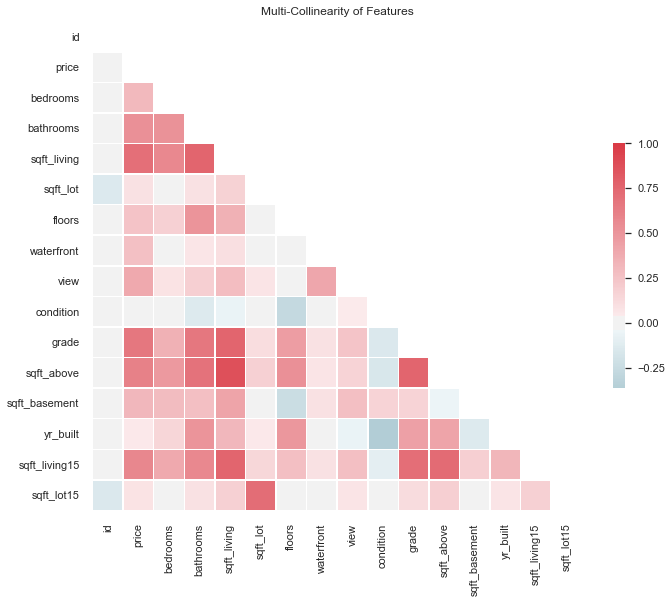

In [7]:
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')

In [8]:
df_mc = df.iloc[:, 1:]
df_mc.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.309057,0.526609,0.704428,0.087430,0.258797,0.270982,0.395766,0.037514,0.667719,0.609611,0.318839,0.053433,0.582450,0.081562
bedrooms,0.309057,1.000000,0.516137,0.577972,0.029685,0.181909,-0.004082,0.083542,0.025047,0.359619,0.480400,0.295875,0.157011,0.392586,0.028005
bathrooms,0.526609,0.516137,1.000000,0.755909,0.085666,0.506058,0.064608,0.186980,-0.126612,0.666475,0.687621,0.277739,0.507069,0.569443,0.086466
sqft_living,0.704428,0.577972,0.755909,1.000000,0.173624,0.356938,0.107416,0.285976,-0.057704,0.763701,0.877669,0.427308,0.317123,0.755524,0.183177
sqft_lot,0.087430,0.029685,0.085666,0.173624,1.000000,-0.007519,0.023164,0.071064,-0.013656,0.114968,0.184383,0.014532,0.055560,0.146576,0.721839
floors,0.258797,0.181909,0.506058,0.356938,-0.007519,1.000000,0.021399,0.029147,-0.263421,0.458230,0.525039,-0.238997,0.490251,0.280229,-0.011145
waterfront,0.270982,-0.004082,0.064608,0.107416,0.023164,0.021399,1.000000,0.406654,0.017175,0.085644,0.073500,0.085962,-0.026612,0.087257,0.031958
view,0.395766,0.083542,0.186980,0.285976,0.071064,0.029147,0.406654,1.000000,0.047143,0.248898,0.168695,0.274985,-0.055862,0.276719,0.071207
condition,0.037514,0.025047,-0.126612,-0.057704,-0.013656,-0.263421,0.017175,0.047143,1.000000,-0.144898,-0.155922,0.166899,-0.361988,-0.092609,-0.004996
grade,0.667719,0.359619,0.666475,0.763701,0.114968,0.458230,0.085644,0.248898,-0.144898,1.000000,0.757406,0.165213,0.446364,0.713765,0.120664


In [9]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
def models(df, feature_cols):
    '''This is a function that outputs the Intercept, Coefficients, and 3 types of Errors'''
    X = df[feature_cols]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    print(f'Intercept of the regression line:',linreg.intercept_)
    print(f'Coefficients:',linreg.coef_)
    print('\n')
    
    y_pred = linreg.predict(X_test)
    #result of Mean Absolute Error
    print(f'Mean Absolute Error:',round(metrics.mean_absolute_error(y_test, y_pred)))

    #result of Mean Squared Error
    print(f'Mean Squared Error:',round(metrics.mean_squared_error(y_test, y_pred)))

    #result Root Mean Squared Error
    print(f'Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

# Input: 
# df = Dataframe
# Feature_cols - A list of strings referencing each feature

# Output:
# print statements regarding the model output

### MODEL 1
Sqft Living, Bedrooms, Bathrooms vs Price. All of these factors are attributes of the house, and may increase or decrease price depending on whether they increase or decrease.

In [86]:
models(df=df, feature_cols=['sqft_living','sqft_lot','bathrooms'])

Intercept of the regression line: -42341.234767135116
Coefficients: [ 2.92615257e+02 -3.63439511e-01 -1.01000606e+04]


Mean Absolute Error: 171182.0
Mean Squared Error: 65935832948.0
Root Mean Squared Error: 256780.0


### Cross-Validation - Model 1

In [92]:
print(np.sqrt(-cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')))
print(linreg.predict(X)-y.values)
print(y.values)
print(linreg.score(X,y))

NameError: name 'linreg' is not defined

### MODEL 2
SqFt Living 15, Sqft Loft 15, Grade vs Price: These factors were selected to see if there was a correlation between quality of neighborhood vs the price of home. 

In [93]:
models(df=df, feature_cols=['sqft_living15','sqft_lot15','grade'])

Intercept of the regression line: -943880.2360038003
Coefficients: [ 1.20746460e+02 -3.35532472e-01  1.63382898e+05]


Mean Absolute Error: 170357.0
Mean Squared Error: 66735791015.0
Root Mean Squared Error: 258333.0


### Model 3
Sqft vs Price

In [91]:
models(df=df, feature_cols=['sqft_living15','grade'])

Intercept of the regression line: -939975.246193056
Coefficients: [1.10304954e+02 1.64689532e+05]


Mean Absolute Error: 171794.0
Mean Squared Error: 70243516798.0
Root Mean Squared Error: 265035.0
